In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\Prodigy\Mall_Customers.csv")

In [3]:
data.head()
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
data = data.drop(columns=['CustomerID'])
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

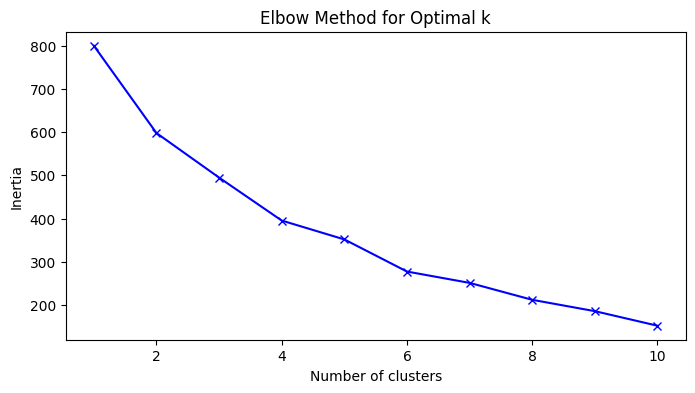

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [9]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=5, random_state=42)

In [11]:
data['Cluster'] = kmeans.labels_

In [13]:
data.head()
import seaborn as sns

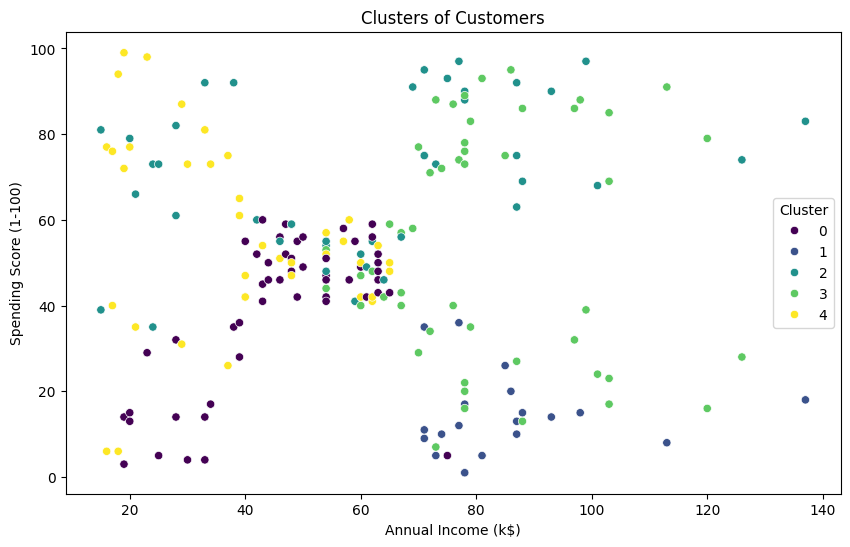

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.show()

In [15]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                 
0        0.490196  56.470588           46.098039               39.313725
1        0.000000  39.500000           85.150000               14.050000
2        0.000000  28.690476           60.904762               70.238095
3        1.000000  37.897959           82.122449               54.448980
4        1.000000  27.315789           38.842105               56.210526
